# Intervalos multi-dimensionales 

Para resolver problemas en más que una dimensión, será necesario poder calcular un *enclosure* ("encierro") de la imagen de una función sobre un conjunto en varias dimensiones.
Para ello, podemos definir **intervalos multi-dimensionales**, de manera análoga a los intervalos uni-dimensionales que ya conocemos.

In [1]:

using Intervals
using IntervalsTest
using PyPlot



    promote_type(Type{T<:Number},Type{Interval}) at /home/pablo1/Documents/Tareas/TareasMetodosNumericosAvanzados/Intervals.jl:467
is ambiguous with: 
    promote_type(Type{None},Type{T}) at promotion.jl:103.
To fix, define 
    promote_type(Type{None},Type{Interval})
before the new definition.
    promote_type(Type{T<:Number},Type{Interval}) at /home/pablo1/Documents/Tareas/TareasMetodosNumericosAvanzados/Intervals.jl:467
is ambiguous with: 
    promote_type(Type{T},Type{T}) at promotion.jl:101.
To fix, define 
    promote_type(Type{_<:Number},Type{_<:Number})
before the new definition.


Prueba básicas de Intervalos:
Solo se utilizó la parte no negativa del intervalo
26 facts verified.


INFO: Loading help data...


[1] ¿Cuál sería una definición matemática razonable de un intervalo multi-dimensional?

La idea es generalizar el concepto usual de intervalo a varias dimensiones:

$\rightarrow\qquad[\overline{a},\overline{b}] := \{\overline{x} \in \mathbb{R}^n : \overline{a} \le \overline{x} \le \overline{b} \}$

Sin embargo en más de una definición no es trivial definir las desigualdades. Una forma de generalizar el concepto es cajas de $n$ dimensiones. En este concepto, cada componente de $\overline{x}$ debe de cumplir con ambas desigualdades respecto a las componentes correspondientes de $\overline{a},\overline{b}$:

$\rightarrow\qquad[\overline{a},\overline{b}] := \{\overline{x} \in \mathbb{R}^n : a_i \le x_i \le b_i \quad \forall \quad i \in {1,2,...,n} \}$

Otra opción, la cual no necesariamente es tan análoga a la unidimensional, sería definir un punto en el espacio de n dimensiones como el centro de una bola y luego proporcionar un radio.

[2] ¿Cómo podríamos expresar esto en Julia? Da dos posibilidades.

[Pista: Checa `typealias`]

 Dos formas posibles serían un arreglo de intervalos para formar la caja. Otra manera viable sería un intervalo donde cada extremo es un arreglo de números.

[3] ¿Cuáles operaciones matemáticas necesitaremos definir sobre los intervalos multi-dimensionales? Impleméntalos en un módulo. ¿Cuál de las dos definiciones resulta más útil en ese respecto?

La de un arreglo de intervalos! Coloco todas mis definiciones en mi modulo actual de intervalos y actualizo los tests.

[4] Considera la función $f: \mathbb{R}^2 \to \mathbb{R}^2$, dada por $f(x,y) = \mathsf{M} \cdot \mathbf{x}$, con $\mathsf{M} = \begin{pmatrix} 2 & 1 \\ 1 & 1 \end{pmatrix}$.

(i) Encuentra a mano la imagen del cuadrado unitario. Encuentra el intervalo multi-dimensional más pequeño que contiene este conjunto.

(ii) Verifica el resultado con tu código.

(iii) ¿Cuál es el problema que ocurre? ¿Cómo lo podríamos resolver? Impleméntalo.

Defino el Intervalo multidimensional que corresponde al cuadrado unitario. La función MakeMultiDimInterval(N,X) me crea un intervalo multidimensional de N componentes, todas de la forma [-X,X]. Creo las cuatro esquinas como arreglos normales y simplemente aplico M a cada uno de ellos para ver la forma del cuadrado.

In [2]:
#Defino el Intervalo multidimensional que corresponde al cuadradu unitario

A = MultiDimInterval(2,[Interval(0,3),Interval(0,2)])
M = [2  1; 1 1]

p1 = [0,0] 
p2 = [1,-0]
p3 = [1,1]
p4 = [0,.1]

det(M)

1.0

In [3]:
function MultiDimIntervalVolume(I::MultiDimInterval)
    
    a=1
    
    for i=1:I.N
        a*=IntervalLength(I.I[i])
    end
    
    return(a)
end

MultiDimIntervalVolume(A)

6.0

In [4]:
f(x)=M*x    

f (generic function with 1 method)

In [5]:
f(p1)

2-element Array{Int64,1}:
 0
 0

In [6]:
f(p3)

2-element Array{Int64,1}:
 3
 2

In [7]:
f(p4)

2-element Array{Float64,1}:
 0.1
 0.1

In [8]:
f(p2)

2-element Array{Int64,1}:
 2
 1

In [9]:
f(A.I)

2-element Array{Interval,1}:
 Interval(0.0,8.0)
 Interval(0.0,5.0)

De nuevo, como en el caso de una dimensión, el problema resulta ser que el intervalo multidimensional obtenido contiene al rango de la función, pero también contiene muchos puntos que no se encuentran en el rango. El jacobiano de la transformación claramente es 1, sin embargo, el código toma un cuadrado de área 1 y lo mapea a un rectangulo de área 6! Una opción posible puede ser mapear el cuadrado unitario "a cachos" es decir, dividirlo en un cierto número de cuadrados más pequeños y generar una matriz de los mapeos resultantes:


In [54]:
function unity_square_mapper(F::Function,N::Int)
    
    map=Array(MultiDimInterval,N,N)
    vol=0
    
    
    for i=1:N
        for j=1:N
            
            A=MultiDimInterval(2,[Interval(0+(1/N)*(i-1),0+(1/N)*i),Interval(0+(1/N)*(j-1),0+(1/N)*j)])
            map[i,j]=MultiDimInterval(2,f(A.I))
            vol+=MultiDimIntervalVolume(map[i,j])  
        end
    end
    
    return(map)
end
                
unity_square_mapper(f,8)   

8x8 Array{MultiDimInterval,2}:
 MultiDimInterval(2,[Interval(0.0,0.375),Interval(0.0,0.25)])      …  MultiDimInterval(2,[Interval(0.875,1.25),Interval(0.875,1.125)])
 MultiDimInterval(2,[Interval(0.25,0.625),Interval(0.125,0.375)])     MultiDimInterval(2,[Interval(1.125,1.5),Interval(1.0,1.25)])    
 MultiDimInterval(2,[Interval(0.5,0.875),Interval(0.25,0.5)])         MultiDimInterval(2,[Interval(1.375,1.75),Interval(1.125,1.375)])
 MultiDimInterval(2,[Interval(0.75,1.125),Interval(0.375,0.625)])     MultiDimInterval(2,[Interval(1.625,2.0),Interval(1.25,1.5)])    
 MultiDimInterval(2,[Interval(1.0,1.375),Interval(0.5,0.75)])         MultiDimInterval(2,[Interval(1.875,2.25),Interval(1.375,1.625)])
 MultiDimInterval(2,[Interval(1.25,1.625),Interval(0.625,0.875)])  …  MultiDimInterval(2,[Interval(2.125,2.5),Interval(1.5,1.75)])    
 MultiDimInterval(2,[Interval(1.5,1.875),Interval(0.75,1.0)])         MultiDimInterval(2,[Interval(2.375,2.75),Interval(1.625,1.875)])
 MultiDimInterval(2,[Int

Esto no resuelve el problema, el área total de los intervalos del mapeo sigue siendo la misma. Parece ser más razonable mapear los cuatro puntos utilizando los intervalos para obtener un "límite superior" y un "límite inferior para cada una de las esquinas.

In [10]:
P1 = MultiDimInterval(2,[Interval(0,0),Interval(0,0)])
P2 = MultiDimInterval(2,[Interval(.75,1.15),Interval(0,0)])
P3 = MultiDimInterval(2,[Interval(.75,1.15),Interval(.75,1.15)])
P4 = MultiDimInterval(2,[Interval(0,0),Interval(.75,1.15)])


MultiDimInterval(2,[Interval(0.0,0.0),Interval(0.75,1.15)])

In [11]:
f1=f(P1.I)

2-element Array{Interval,1}:
 Interval(0.0,0.0)
 Interval(0.0,0.0)

In [12]:
f2=f(P2.I)

2-element Array{Interval,1}:
 Interval(1.5,2.3)  
 Interval(0.75,1.15)

In [13]:
f3=f(P3.I)

2-element Array{Interval,1}:
 Interval(2.25,3.4499999999999997)
 Interval(1.5,2.3)                

In [14]:
f4=f(P4.I)

2-element Array{Interval,1}:
 Interval(0.75,1.15)
 Interval(0.75,1.15)

In [15]:
xmin=[f1[1].a,f2[1].a,f3[1].a,f4[1].a]
ymin=[f1[2].a,f2[2].a,f3[2].a,f4[2].a]

xmax=[f1[1].b,f2[1].b,f3[1].b,f4[1].b]
ymax=[f1[2].b,f2[2].b,f3[2].b,f4[2].b]

4-element Array{Float64,1}:
 0.0 
 1.15
 2.3 
 1.15

In [16]:
plot(layer(x=xmin,y=ymin,Geom.point),layer(x=xmax,y=ymax,Geom.point))

LoadError: layer not defined
while loading In[16], in expression starting on line 1

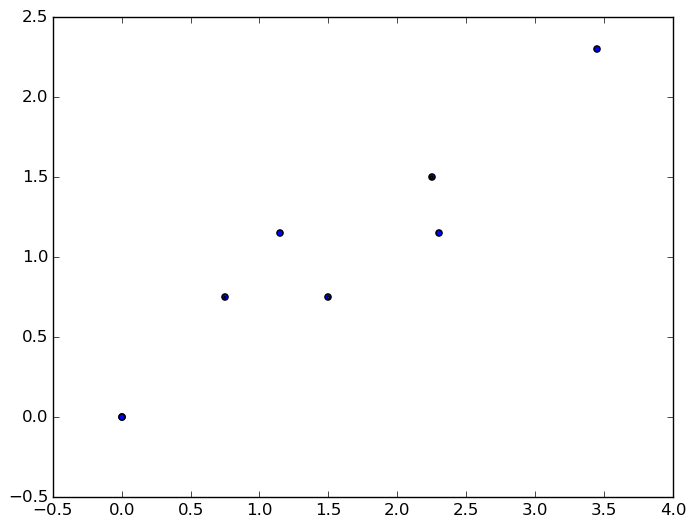

PyObject <matplotlib.collections.PathCollection object at 0x7f42c12e9cd0>

In [143]:
scatter(xmax,ymax)

[5] Haz lo mismo para la imagen del cuadrado unitario bajo la función 

$$ \begin{pmatrix} x \\ y \end{pmatrix} \mapsto 
\begin{pmatrix} 1 - ax^2 + y \\ b x \end{pmatrix},$$

con $a = 1.4$ y $b=0.3$ (el famoso "mapeo de Hénon").

In [59]:
function Henon(I)
    return(MultiDimInterval(2,[1-1.4*I[1]+I[2],.3*I[1]]))
end

Henon (generic function with 1 method)

In [58]:
Henon(A.I)

(Interval(-0.3999999999999999,2.0),Interval(0.0,0.3))

In [59]:
Henon(p1)

(1.0,0.0)

In [60]:
Henon(p2)

(-0.3999999999999999,0.3)

In [61]:
Henon(p3)

(0.6000000000000001,0.3)

In [62]:
Henon(p4)

(2.0,0.0)

Ahora la matriz Jacobiana es más compleja, ya que no es consntante:

$\begin{pmatrix} -2ax & 1 \\ b & 0 \end{pmatrix}$

El jacobiano de la función es b.

In [60]:
MultiDimIntervalVolume(Henon(A.I))

5.58

Pero esto cubre mucha más área de lo esperado!

In [149]:
h1=Henon(P1.I).I

2-element Array{Interval,1}:
 Interval(1.0,1.0)
 Interval(0.0,0.0)

In [150]:
h2=Henon(P2.I).I

2-element Array{Interval,1}:
 Interval(-0.6099999999999999,-0.04999999999999982)
 Interval(0.22499999999999998,0.345)               

In [151]:
h3=Henon(P3.I).I

2-element Array{Interval,1}:
 Interval(0.14000000000000012,1.1)  
 Interval(0.22499999999999998,0.345)

In [152]:
h4=Henon(P4.I).I

2-element Array{Interval,1}:
 Interval(1.75,2.15)
 Interval(0.0,0.0)  

In [158]:
hxmin=[h1[1].a,h2[1].a,h3[1].a,h4[1].a]
hymin=[h1[2].a,h2[2].a,h3[2].a,h4[2].a]

hxmax=[h1[1].b,h2[1].b,h3[1].b,h4[1].b]
hymax=[h1[2].b,h2[2].b,h3[2].b,h4[2].b]

4-element Array{Float64,1}:
 0.0  
 0.345
 0.345
 0.0  

In [17]:
scatter(hxmin,hymin)

LoadError: hxmin not defined
while loading In[17], in expression starting on line 1

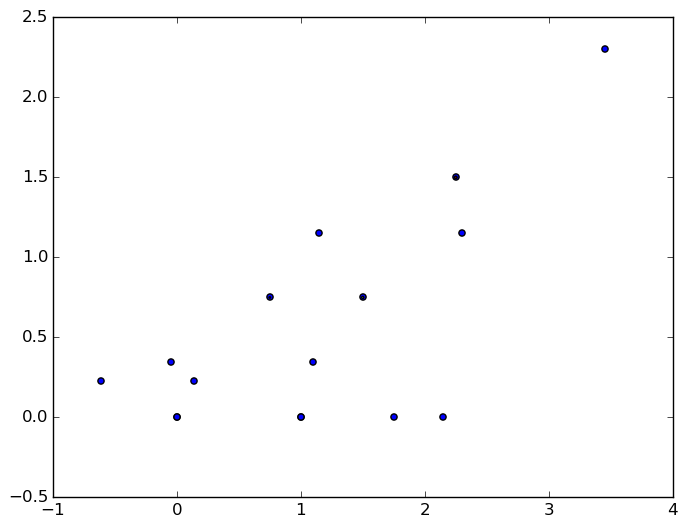

PyObject <matplotlib.collections.PathCollection object at 0x7f42c1612350>

In [159]:
scatter(hxmax,hymax)